In [1]:
from SnakeGA import SnakeSettings
from SnakeGA import SnakeGA
import taichi as ti
import numpy as np
import matplotlib.pyplot as plt


[Taichi] version 1.3.0, llvm 15.0.1, commit 0f25b95e, win, python 3.10.9


In [2]:
params_count = 32 * 20 + 20 * 12 + 12 * 4 + 20 + 12 + 4
params_count

964

In [3]:
settings = SnakeSettings(field_size=10,
                         view_depth=3,
                         steps_without_apple=100,
                         nn_neurons_count=[32, 20, 12, 4],
                         nn_activations=["input", "relu", "relu", "sigmoid"],
                         nn_params_count=params_count,
                         population_size=100,
                         epochs=30,
                         crossover_rate=0.8,
                         mutation_rate=0.003,
                         elitism_num=10)


In [4]:
ti.profiler.clear_kernel_profiler_info()  # clear all records

snakes = SnakeGA(settings=settings)
snakes.advance()

ti.profiler.print_kernel_profiler_info(mode='count')


[Taichi] Starting on arch=x64
Kernel Profiler(count, default) @ X64 
[      %     total   count |      min       avg       max   ] Kernel name
-------------------------------------------------------------------------
[ 96.91%   0.434 s   3000x |    0.067     0.145     0.490 ms] tensor_to_ext_arr_c6_0_kernel_0_range_for
[  1.28%   0.006 s     30x |    0.140     0.191     0.254 ms] crossover_c84_0_kernel_0_range_for
[  0.87%   0.004 s     30x |    0.086     0.130     0.247 ms] switch_population_c90_0_kernel_0_range_for
[  0.31%   0.001 s   3000x |    0.000     0.000     0.005 ms] snode_writer_10_kernel_0_serial
[  0.18%   0.001 s     30x |    0.015     0.028     0.051 ms] mutation_c86_0_kernel_0_range_for
[  0.18%   0.001 s     30x |    0.018     0.026     0.036 ms] tornament_selection_c82_0_kernel_0_range_for
[  0.13%   0.001 s     30x |    0.013     0.020     0.045 ms] log_c92_0_kernel_2_range_for
[  0.11%   0.000 s      1x |    0.485     0.485     0.485 ms] ramdomize_genes_c80_0_kerne

Text(0, 0.5, 'AVG Fitness')

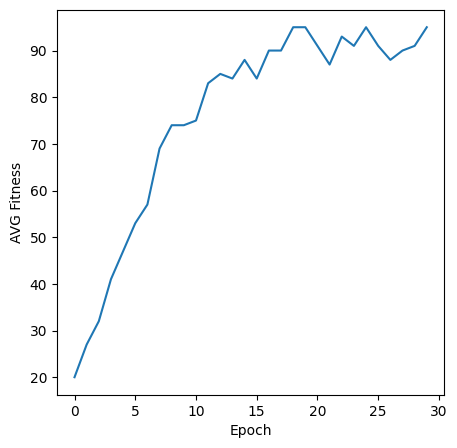

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

plt.plot(snakes.history.to_numpy())
plt.xlabel("Epoch")
plt.ylabel("AVG Fitness")